In [1]:
# face verification with the VGGFace2 model
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
#     pixels = pyplot.imread(filename)
#     # create the detector, using default weights
#     detector = MTCNN()
#     # detect faces in the image
#     results = detector.detect_faces(pixels)
#     # extract the bounding box from the first face
#     x1, y1, width, height = results[0]['box']
#     x2, y2 = x1 + width, y1 + height
#     # extract the face
#     face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.open(filename)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

model = None
# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
    # extract faces
    faces = [extract_face(f) for f in filenames]
    # convert into an array of samples
    samples = asarray(faces, 'float32')
    # prepare the face for the model, e.g. center pixels
    samples = preprocess_input(samples, version=2)
    # create a vggface model
    global model
    if not model:
        model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
    # perform prediction
    yhat = model.predict(samples)
    return yhat

# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    if score <= thresh:
        print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
        return True, score
    else:
        print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))
        return False, score

In [39]:
# #facenet model structure: https://github.com/serengil/tensorflow-101/blob/master/model/facenet_model.json
# model = model_from_json(open(r"D:\self\university\workshop\project\data\facenet\facenet_model.json", "r").read())
 
# #pre-trained weights https://drive.google.com/file/d/1971Xk5RwedbudGgTIrGAL4F7Aifu7id1/view?usp=sharing
# model.load_weights(r'D:\self\university\workshop\project\data\facenet\facenet_weights.h5')
 
# model.summary()

In [7]:
# from inception_resnet_v1 import *
# model = InceptionResNetV1()

In [9]:
# import numpy as np
# def l2_normalize(x):
#     return x / np.sqrt(np.sum(np.multiply(x, x)))

In [11]:
# def findEuclideanDistance(source_representation, test_representation):
#     euclidean_distance = source_representation - test_representation
#     euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
#     euclidean_distance = np.sqrt(euclidean_distance)
#     return euclidean_distance

In [12]:
# import numpy as np

# from keras.models import Sequential
# from keras.models import load_model
# from keras.models import model_from_json
# from keras.layers.core import Dense, Activation
# from keras.utils import np_utils

# from keras.preprocessing.image import load_img, save_img, img_to_array
# from keras.applications.imagenet_utils import preprocess_input

# import matplotlib.pyplot as plt
# from keras.preprocessing import image

In [14]:
# def preprocess_image(image_path):
#     img = load_img(image_path, target_size=(160, 160))
#     img = img_to_array(img)
#     img = np.expand_dims(img, axis=0)
#     img = preprocess_input(img)
#     return img

In [18]:
# img1_representation = l2_normalize(model.predict(preprocess_image(r"D:\self\university\workshop\project\data\AFDB\AFDB_face_dataset\AFDB_face_dataset\aidai\0_0_aidai_0014.jpg"))[0,:])
# img2_representation = l2_normalize(model.predict(preprocess_image(r"D:\self\university\workshop\project\data\AFDB\AFDB_masked_face_dataset\AFDB_masked_face_dataset\aidai\0_0_0.jpg"))[0,:])
 
# euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
# threshold = 0.35
# if euclidean_distance < threshold:
#     print("verified... they are same person")
# else:
#     print("unverified! they are not same person!")

verified... they are same person


In [2]:
import pathlib

threshold = 0.35
SAMPLE_SIZE = 10
BASE_PATH = pathlib.Path('../data/AFDB')

unmasked_dataset_path = BASE_PATH / 'AFDB_face_dataset' / 'AFDB_face_dataset'
masked_dataset_path = BASE_PATH / 'AFDB_masked_face_dataset' / 'AFDB_masked_face_dataset'

In [4]:
results = []


unmasked_people = sorted(list(unmasked_dataset_path.iterdir()))
for unmasked_person in unmasked_people:
    masked_person = masked_dataset_path / unmasked_person.name
    if not masked_person.is_dir():
        continue
    unmasked_image_path = str(sorted(list(unmasked_person.iterdir()))[0])
    masked_image_path = str(sorted(list(masked_person.iterdir()))[0])
    
    try:
        features1,features2= get_embeddings([unmasked_image_path, masked_image_path])
        matched, distance = is_match(features1, features2)
    except Exception as e:
        print(e)
        continue
    
    results.append([unmasked_person.name, matched, distance])

>face is NOT a Match (0.634 > 0.500)
>face is NOT a Match (0.770 > 0.500)
>face is NOT a Match (0.646 > 0.500)
>face is NOT a Match (0.588 > 0.500)
>face is NOT a Match (0.605 > 0.500)
>face is NOT a Match (0.502 > 0.500)
>face is NOT a Match (0.591 > 0.500)
>face is NOT a Match (0.679 > 0.500)
>face is NOT a Match (0.560 > 0.500)
>face is NOT a Match (0.594 > 0.500)
>face is a Match (0.461 <= 0.500)
>face is NOT a Match (0.527 > 0.500)
>face is NOT a Match (0.693 > 0.500)
>face is NOT a Match (0.564 > 0.500)
>face is NOT a Match (0.664 > 0.500)
>face is NOT a Match (0.584 > 0.500)
>face is a Match (0.480 <= 0.500)
>face is a Match (0.371 <= 0.500)
>face is NOT a Match (0.540 > 0.500)
>face is NOT a Match (0.581 > 0.500)
>face is NOT a Match (0.558 > 0.500)
>face is a Match (0.490 <= 0.500)
>face is a Match (0.450 <= 0.500)
>face is a Match (0.420 <= 0.500)
>face is NOT a Match (0.673 > 0.500)
>face is NOT a Match (0.767 > 0.500)
>face is NOT a Match (0.698 > 0.500)
>face is NOT a Matc

>face is NOT a Match (0.699 > 0.500)
>face is NOT a Match (0.712 > 0.500)
>face is NOT a Match (0.702 > 0.500)
>face is a Match (0.321 <= 0.500)
>face is NOT a Match (0.901 > 0.500)
>face is a Match (0.491 <= 0.500)
>face is NOT a Match (0.688 > 0.500)
>face is NOT a Match (0.644 > 0.500)
>face is NOT a Match (0.581 > 0.500)
>face is NOT a Match (0.637 > 0.500)
>face is a Match (0.473 <= 0.500)
>face is NOT a Match (0.668 > 0.500)
>face is NOT a Match (0.522 > 0.500)
>face is NOT a Match (0.695 > 0.500)
>face is NOT a Match (0.766 > 0.500)
>face is a Match (0.463 <= 0.500)
>face is NOT a Match (0.742 > 0.500)
>face is NOT a Match (0.510 > 0.500)
>face is NOT a Match (0.762 > 0.500)
>face is NOT a Match (0.574 > 0.500)
>face is NOT a Match (0.673 > 0.500)
>face is NOT a Match (0.590 > 0.500)
>face is NOT a Match (0.630 > 0.500)
>face is NOT a Match (0.635 > 0.500)
>face is NOT a Match (0.676 > 0.500)
>face is a Match (0.418 <= 0.500)
>face is NOT a Match (0.506 > 0.500)
>face is a Match

In [5]:
len([x for x in results if x[1]])

83

In [6]:
results_neg = []

unmasked_faces = []
masked_faces = []
unmasked_people = sorted(list(unmasked_dataset_path.iterdir()))
for unmasked_person in unmasked_people:
    masked_person = masked_dataset_path / unmasked_person.name
    if not masked_person.is_dir():
        continue
    unmasked_image_path = sorted(list(unmasked_person.iterdir()))[0]
    masked_image_path = sorted(list(masked_person.iterdir()))[0]
    unmasked_faces.append(unmasked_image_path)
    masked_faces.append(masked_image_path)
    
for unmasked_image_path, masked_image_path in zip(unmasked_faces, masked_faces[1:]):
    try:
        features1,features2=get_embeddings([unmasked_image_path, masked_image_path])
        matched, distance = is_match(features1, features2)
    except Exception as e:
        print(e)
        continue
    
    results_neg.append([(unmasked_image_path.parent.name, masked_image_path.parent.name), matched, distance])

>face is NOT a Match (0.748 > 0.500)
>face is NOT a Match (0.792 > 0.500)
>face is NOT a Match (0.649 > 0.500)
>face is NOT a Match (0.649 > 0.500)
>face is a Match (0.388 <= 0.500)
>face is NOT a Match (0.765 > 0.500)
>face is NOT a Match (0.729 > 0.500)
>face is NOT a Match (0.713 > 0.500)
>face is NOT a Match (0.663 > 0.500)
>face is NOT a Match (0.563 > 0.500)
>face is NOT a Match (0.739 > 0.500)
>face is NOT a Match (0.748 > 0.500)
>face is NOT a Match (0.746 > 0.500)
>face is NOT a Match (0.718 > 0.500)
>face is NOT a Match (0.631 > 0.500)
>face is NOT a Match (0.577 > 0.500)
>face is NOT a Match (0.721 > 0.500)
>face is NOT a Match (0.564 > 0.500)
>face is NOT a Match (0.715 > 0.500)
>face is NOT a Match (0.759 > 0.500)
>face is NOT a Match (0.611 > 0.500)
>face is NOT a Match (0.652 > 0.500)
>face is NOT a Match (0.725 > 0.500)
>face is NOT a Match (0.702 > 0.500)
>face is NOT a Match (0.758 > 0.500)
>face is NOT a Match (0.731 > 0.500)
>face is NOT a Match (0.727 > 0.500)
>fac

>face is NOT a Match (0.753 > 0.500)
>face is NOT a Match (0.590 > 0.500)
>face is NOT a Match (0.671 > 0.500)
>face is NOT a Match (0.599 > 0.500)
>face is NOT a Match (0.718 > 0.500)
>face is NOT a Match (0.765 > 0.500)
>face is NOT a Match (0.709 > 0.500)
>face is NOT a Match (0.770 > 0.500)
>face is NOT a Match (0.836 > 0.500)
>face is NOT a Match (0.762 > 0.500)
>face is NOT a Match (0.660 > 0.500)
>face is NOT a Match (0.580 > 0.500)
>face is NOT a Match (0.707 > 0.500)
>face is NOT a Match (0.634 > 0.500)
>face is NOT a Match (0.744 > 0.500)
>face is NOT a Match (0.783 > 0.500)
>face is NOT a Match (0.713 > 0.500)
>face is NOT a Match (0.744 > 0.500)
>face is NOT a Match (0.787 > 0.500)
>face is NOT a Match (0.678 > 0.500)
>face is NOT a Match (0.720 > 0.500)
>face is NOT a Match (0.625 > 0.500)
>face is NOT a Match (0.750 > 0.500)
>face is NOT a Match (0.687 > 0.500)
>face is NOT a Match (0.734 > 0.500)
>face is NOT a Match (0.716 > 0.500)
>face is NOT a Match (0.687 > 0.500)
>

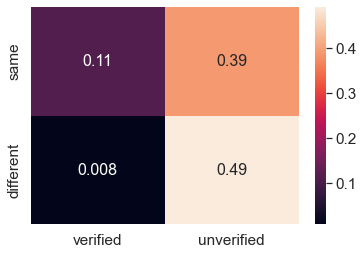

In [7]:
TP=len([x for x in results if x[1]]) / (len(results) + len(results_neg))
FN=len([x for x in results if not x[1]]) / (len(results) + len(results_neg))
FP=len([x for x in results_neg if x[1]]) / (len(results) + len(results_neg))
TN=len([x for x in results_neg if not x[1]]) / (len(results) + len(results_neg))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TP,FN],
         [FP,TN]]

df_cm = pd.DataFrame(array, ['same', 'different'], ['verified', 'unverified'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [8]:
from sklearn import svm
X = [x[2] for x in results] + [x[2] for x in results_neg]
y = [1 for x in results] + [0 for x in results_neg]
clf = svm.SVC() #kernel="linear")
clf.fit(np.array(X).reshape(-1, 1), y)

SVC()

In [9]:
ps=clf.predict(np.array([x[2] for x in results]).reshape(-1, 1))

In [10]:
ns=clf.predict(np.array([x[2] for x in results_neg]).reshape(-1, 1))

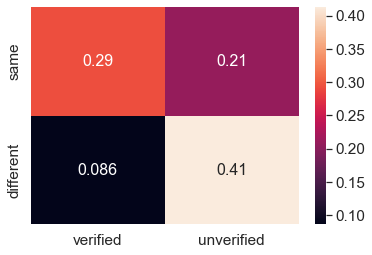

In [11]:
TP=len([x for x in ps if x]) / (len(results) + len(results_neg))
FN=len([x for x in ps if not x]) / (len(results) + len(results_neg))
FP=len([x for x in ns if x]) / (len(results) + len(results_neg))
TN=len([x for x in ns if not x]) / (len(results) + len(results_neg))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TP,FN],
         [FP,TN]]

df_cm = pd.DataFrame(array, ['same', 'different'], ['verified', 'unverified'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()